In [1]:
import cv2
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from deepface import DeepFace
import tensorflow as tf 

# Step 1: Using a Pre-Trained Model (DeepFace and CV2)

The first part of this project involves using a pre-trained model to study as a benchmark. First, for study, we explore overlaying an emoji on a singular image using the DeepFace package, following the procedure below. Specifically, we first take an image, identify the emotion expressed by the face in the image, and then overlay an emoji corresponding to that image over the face of the person in the image. 

## Model Exploration: Localizing and Testing on an Image

We first take a sample image, analyze it using the Deepface package, and then overlay an emoji corresponding to the emotion of the face in the picture. 

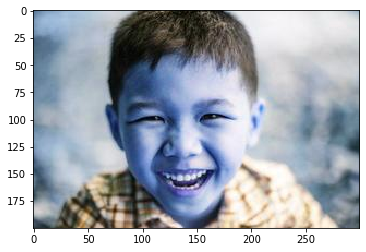

In [2]:
# reading a sample image to test using the DeepFace package. 
boy = cv2.imread("sample-face2.jpg")
plt.imshow(boy)

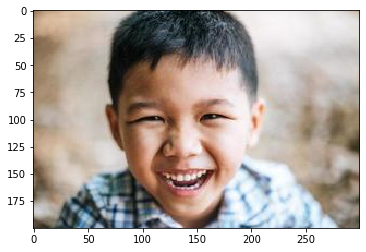

In [3]:
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))

In [4]:
# using the DeepFace analyze method to analyze the features of the image. 
estimates_boy = DeepFace.analyze(boy)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.18it/s]


In [5]:
estimates_boy

[{'emotion': {'angry': 0.1154328347183764,
   'disgust': 0.04052645526826382,
   'fear': 97.00143933296204,
   'happy': 2.532093971967697,
   'sad': 0.3073351224884391,
   'surprise': 2.2098484464549983e-05,
   'neutral': 0.0031459214369533584},
  'dominant_emotion': 'fear',
  'region': {'x': 75, 'y': 48, 'w': 131, 'h': 131},
  'age': 22,
  'gender': {'Woman': 0.2164674224331975, 'Man': 99.78353381156921},
  'dominant_gender': 'Man',
  'race': {'asian': 99.75457787513733,
   'indian': 0.013256103557068855,
   'black': 0.00032584721338935196,
   'white': 0.004762272510561161,
   'middle eastern': 5.621278997836043e-07,
   'latino hispanic': 0.2270811703056097},
  'dominant_race': 'asian'}]

In [6]:
# obtaining the predicted emotion using the DeepFace package. 
estimates_boy[0]['dominant_emotion']

'fear'

In [7]:
color_boy = cv2.cvtColor(boy,cv2.COLOR_BGR2GRAY)

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [9]:
boy_face = face_cascade.detectMultiScale(color_boy, 1.1, 4)

In [10]:
# defining a set of emojis for use: 
# the 7 features/emotions used in this project are 
# happy, sad, neutral, angry, disgust, fear, and surprise. 

happy_emoji = cv2.imread('emojis/happy_emoji.png', cv2.IMREAD_UNCHANGED)
sad_emoji = cv2.imread('emojis/sad_emoji.png', cv2.IMREAD_UNCHANGED)
neutral_emoji = cv2.imread('emojis/neutral_emoji.png', cv2.IMREAD_UNCHANGED)
angry_emoji = cv2.imread('emojis/angry_emoji.png', cv2.IMREAD_UNCHANGED)
disgust_emoji = cv2.imread('emojis/disgust_emoji.png', cv2.IMREAD_UNCHANGED)
fear_emoji = cv2.imread('emojis/fear_emoji.png', cv2.IMREAD_UNCHANGED)
surprise_emoji = cv2.imread('emojis/surprise_emoji.png', cv2.IMREAD_UNCHANGED)

# function to convert an emotion to its 
# corresponding emoji image. 
def emoji_overlay(emotion): 
    
    # if the predicted emotion is an int (output of the trained models)
    # map the int predictions to the images. 
    if type(emotion) is int: 
        emotion_map = {0: angry_emoji, 
                       1: disgust_emoji, 
                       2: fear_emoji, 
                       3: happy_emoji, 
                       4: sad_emoji, 
                       5: surprise_emoji, 
                       6: neutral_emoji}
    # else, map the results of the DeepFace analysis to 
    # its corresponding emoji parts. 
    else: 
        emotion_map = {"angry": angry_emoji,
                 "disgust": disgust_emoji, 
                 "fear": fear_emoji, 
                 "happy": happy_emoji, 
                 "sad": sad_emoji, 
                 "surprise": surprise_emoji, 
                 "neutral": neutral_emoji}
    
    return emotion_map[emotion]

    

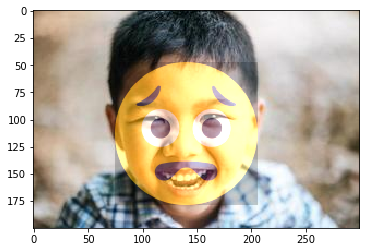

In [11]:
# overlaying the emoji over the face of the boy in the image. 

emotion = estimates_boy[0]['dominant_emotion']

# obtaining the predicted emoji 
predicted_emoji = emoji_overlay(emotion)

resized_emoji = cv2.resize(predicted_emoji, (100, 100))

# overlaying the predicted image over the face in the image, 
# calculating the face location to localize and overlay directly over the face. 
for (x, y, w, h) in boy_face: 
    face = boy[y:y+h, x:x+w]
    emoji = predicted_emoji 
    emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)
    if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
    overlay = cv2.addWeighted(face, 0.8, emoji, 0.5, 0)
    boy[y:y+h, x:x+w] = overlay
    

# showing the image with the overlaid emoji, corresponding to the 
# expression given by the face as predicted by DeepFace. 
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))


## Overlaying Emoji on Live Video
The next steps will involve overlaying an emoji on a live video. 

In [12]:

import cv2
from deepface import DeepFace
import numpy as np

# Loading the face classifier: haarcascade to analyze facial emotions. 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the emojis images
happy_emoji = cv2.imread('emojis/happy_emoji.png', cv2.IMREAD_UNCHANGED)
sad_emoji = cv2.imread('emojis/sad_emoji.png', cv2.IMREAD_UNCHANGED)
neutral_emoji = cv2.imread('emojis/neutral_emoji.png', cv2.IMREAD_UNCHANGED)
angry_emoji = cv2.imread('emojis/angry_emoji.png', cv2.IMREAD_UNCHANGED)
disgust_emoji = cv2.imread('emojis/disgust_emoji.png', cv2.IMREAD_UNCHANGED)
fear_emoji = cv2.imread('emojis/fear_emoji.png', cv2.IMREAD_UNCHANGED)
surprise_emoji = cv2.imread('emojis/surprise_emoji.png', cv2.IMREAD_UNCHANGED)


# Start capturing the video from the default camera
video_capture = cv2.VideoCapture(0)

while True:
    # Read a frame from the video capture
    ret, frame = video_capture.read()
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Loop through each detected face
    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face = frame[y:y+h, x:x+w]
        
        # Use DeepFace to detect the emotion of the face
        result = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        emotion = result[0]['dominant_emotion']
        
        emoji = "" 
        # Determine which emoji to overlay based on the detected emotion
        if emotion == 'happy':
            emoji = happy_emoji
#         emoji_data = np.asarray(emoji)
        elif emotion == 'sad':
            emoji = sad_emoji
            
        elif emotion == "angry": 
            emoji = angry_emoji 
        
        elif emotion == "fear": 
            emoji = fear_emoji 
            
        elif emotion == "surprise": 
            emoji = surprise_emoji 
            
        elif emotion == "disgust": 
            emoji = disgust_emoji 
            
        else: 
            emoji = neutral_emoji
        
        # Resize the emoji to match the size of the detected face
#         emoji = cv2.resize(emoji_data, (w, h))

        emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)

        
        # Overlay the emoji on the face
#         overlay = cv2.addWeighted(face, 1, emoji, 0.5, 0)
        if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
        overlay = cv2.addWeighted(face, 1, emoji, 0.5, 0)

        
        # Replace the face in the original frame with the overlay
        frame[y:y+h, x:x+w] = overlay
    
    # Display the resulting frame
    cv2.imshow('Video', frame)
    
    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
video_capture.release()
cv2.destroyAllWindows()


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.15it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]


# Step 2: Overlaying Emojis on Trained Models

In Step 1, we overlaid emojis on images, and did a live demo of overlaying emojis over a person's face in a live video, using the pre-trained model (CV2 and DeepFace). In this step, we overlay emojis on the images based off of the predictions of the models we trained. 

## Loading the Models using H5

In [13]:
import tensorflow as tf

# Load the model from the .h5 file
basic_cnn_model = tf.keras.models.load_model("basic_cnn_model.h5", compile=False)
basic_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(image_path, target_size=(48, 48)):
    img = image.load_img(image_path, target_size=target_size, color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.
    return img_array

image_path = "sample-face2.jpg"
img_array = preprocess_image(image_path)

In [15]:
predictions = basic_cnn_model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)

Predicted class: 5


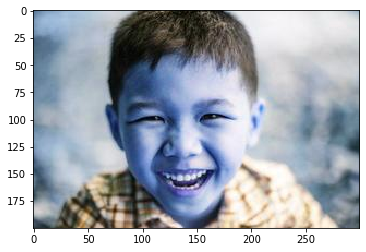

In [16]:
boy = cv2.imread("sample-face2.jpg")
plt.imshow(boy)

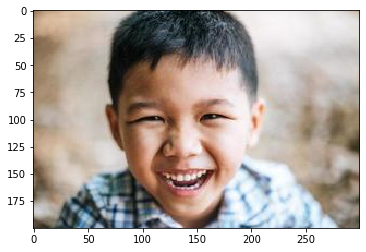

In [17]:
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))

In [18]:
color_boy = cv2.cvtColor(boy,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
boy_face = face_cascade.detectMultiScale(color_boy, 1.1, 4)

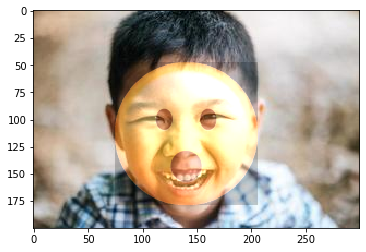

In [19]:
predicted_emoji = emoji_overlay(int(predicted_class))

resized_emoji = cv2.resize(predicted_emoji, (100, 100))

# overlaying the predicted image over the face in the image, 
# calculating the face location to localize and overlay directly over the face. 
for (x, y, w, h) in boy_face: 
    face = boy[y:y+h, x:x+w]
    emoji = predicted_emoji 
    emoji = cv2.resize(emoji, (w, h), interpolation=cv2.INTER_AREA)
    if emoji.shape[2] == 4:
            emoji = cv2.cvtColor(emoji, cv2.COLOR_BGRA2BGR)
    overlay = cv2.addWeighted(face, 0.8, emoji, 0.5, 0)
    boy[y:y+h, x:x+w] = overlay
    

# showing the image with the overlaid emoji, corresponding to the 
# expression given by the face as predicted by DeepFace. 
plt.imshow(cv2.cvtColor(boy, cv2.COLOR_BGR2RGB))
